# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('train_house.csv')
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Drop variabel NaN
total = house.isnull().sum().sort_values(ascending = False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [7]:
house = house.dropna(axis=1)
house.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [8]:
# Memisahkan data menjadi numerikal & kategorikal
#mendapatkan data numerik
num_cols = house._get_numeric_data().columns
house_numeric = house[num_cols]
house_numeric.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


analisis


*   Memiliki 35 variabel numerik
*   3 diantaranya adalah time series : yearBuilt, YarRemodAdd, YrSold
*   sampai sejauh ini masih mengasumsikan semua adalah vaiabel numerik, tidak ada yang berupa kategori atau ordinal





In [9]:
#mendapatkan nilai kategorikal
house_categorical = house.drop(num_cols, axis=1)
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


analisis


*   memiliki 27 variabel non numerik
*   analisis lebih lanjut dilakukan dengan Bar chart



# 1D Visualization

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual`

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

visualisasi histogram dan analisis untuk variabel numerikal:

## Variabel Kategorikal

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut

       AllPub	All public Utilities (E,G,W,& S)
       NoSeWa	Electricity and Gas Only

<Axes: ylabel='Utilities'>

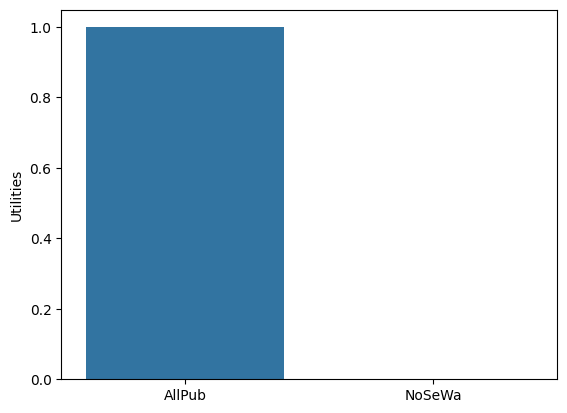

In [10]:
#visualisasi barplot dan analisis untuk variabel kategorikal:
sns.barplot (x = house_categorical['Utilities'].value_counts().index,
             y = house_categorical['Utilities'].value_counts(normalize=True))

Dari kategorikal tersebut, kita dapat mengetahui bahwa 100% dari data adalah kategori AllPub yaitu All public Utilities (E,G,W,& S)


### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

<Axes: ylabel='HouseStyle'>

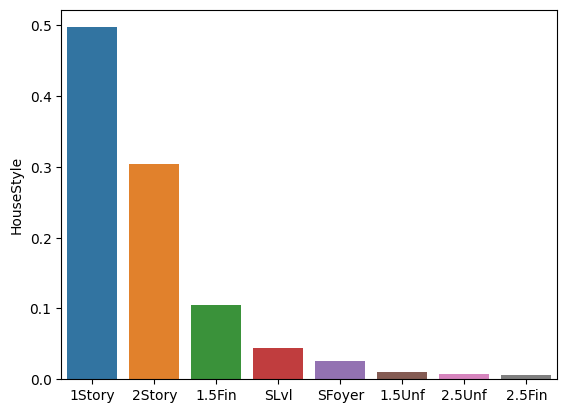

In [11]:
#visualisasi barplot dan analisis untuk variabel kategorikal:
sns.barplot (x = house_categorical['HouseStyle'].value_counts().index,
             y = house_categorical['HouseStyle'].value_counts(normalize=True))

1.   dapat dilihat bahwa datanya imbalanced
2.   sekitar 50% properti bergaya 1 Story
3.   sekitar 30% properti bergaya 2 Story
4.   10% properti bergaya 1.5Fin	One and one-half story: 2nd level finished
4.   kurang dari 10% properti bergaya SLvl, SFoyer, SFoyer, 2.5Fin,2.SFoyer, 1.5Unf


### ExterQual

ExterQual: Kualitas material eksterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

#### **Analisis tentang variabel kategorikal**

* [*tulis analisis dan pertanyaan Anda di sini*]

<Axes: ylabel='ExterQual'>

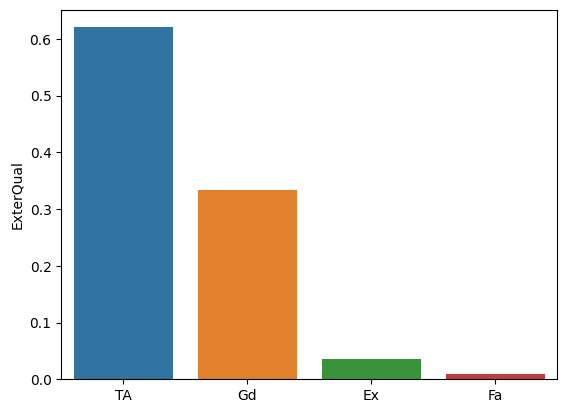

In [12]:
#visualisasi barplot dan analisis untuk variabel kategorikal:
sns.barplot (x = house_categorical['ExterQual'].value_counts().index,
             y = house_categorical['ExterQual'].value_counts(normalize=True))

*   dapat dilihat bahwa datanya imbalanced
*   lebih dari 60 % kualitas properti adalah TA atau Average/Typical
*   lebih dari 30% kualitas properti adalah baik
*   kurang dari 10% kualitas properti Excellent dan fair


## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

<ipython-input-13-bbec9da83001>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel = x.name)


Median :  163000.0
Mean :  180921.19589041095
Std Dev :  79442.50288288662


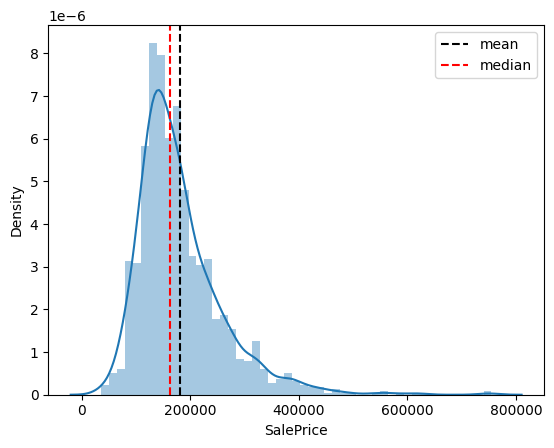

In [13]:
x = house_numeric["SalePrice"]
sns.distplot(x, axlabel = x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median : ", x.median())
print("Mean : " , x.mean())
print("Std Dev : ", x.std())
plt.show()

#### **Analisis tentang variabel `SalePrice`**

* Distirbusi right-skewed
*   Kebanyakan data berada dalam range sekitar 100,000 sampai 300,000.
*   Nilai selalu posirif. Namun kalau dimasukkan ke model ML pdeiksi bisa jadi negatif kalau salah



### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

<ipython-input-21-d9fe3cd1f057>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel = x.name)


Median :  1464.0
Mean :  1515.463698630137
Std Dev :  525.4803834232025


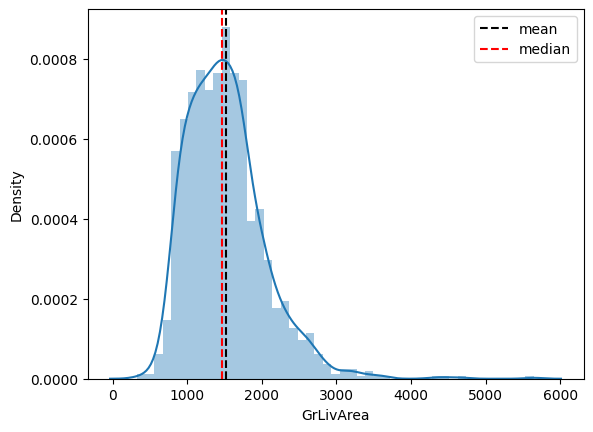

In [21]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = house_numeric["GrLivArea"]
sns.distplot(x, axlabel = x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median : ", x.median())
print("Mean : " , x.mean())
print("Std Dev : ", x.std())
plt.show()

#### **Analisis tentang variabel `GrlivArea`**


* Distirbusi right-skewed
*   Kebanyakan data berada dalam range sekitar 1000 sampai 2000.
*   Nilai selalu posirif. Namun kalau dimasukkan ke model ML pdeiksi bisa jadi negatif kalau salah

### GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

<ipython-input-15-8f0d3204f508>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel = x.name)


Median :  480.0
Mean :  472.9801369863014
Std Dev :  213.80484145338042


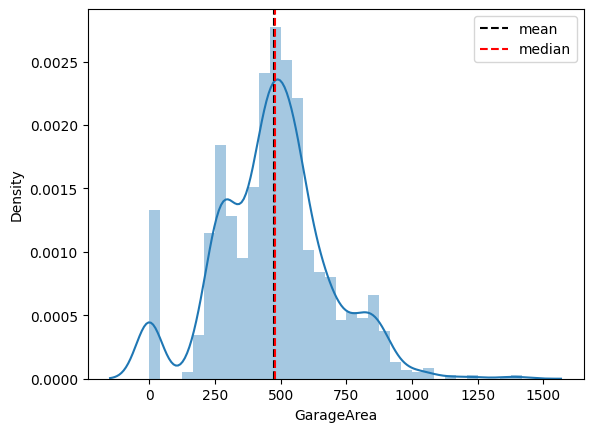

In [15]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = house_numeric["GarageArea"]
sns.distplot(x, axlabel = x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median : ", x.median())
print("Mean : " , x.mean())
print("Std Dev : ", x.std())
plt.show()

#### **Analisis tentang variabel `GarageArea`**

* Distirbusi right-skewed
*   Kebanyakan data berada dalam range sekitar 1000 sampai 2000.
*   Nilai selalu posirif. Namun kalau dimasukkan ke model ML pdeiksi bisa jadi negatif kalau salah
*   Terdapat cukup banyak yang tidak memiliki garasi




## Pemrosesan Data Variabel Numerikal

<ipython-input-17-523d18c17115>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median :  5.212187604403958
Mean :  5.221978956475628
Std Dev :  0.17347974217176834


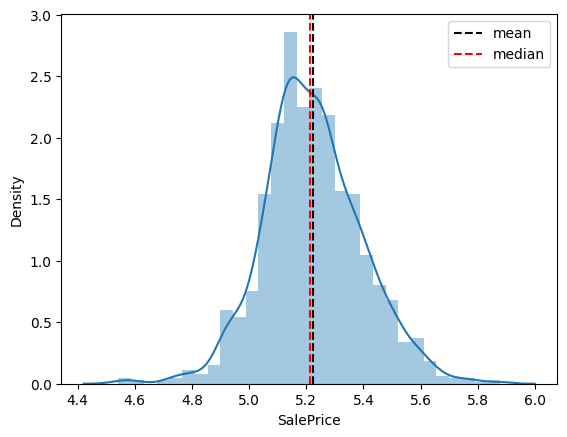

In [17]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

x = np.log10(house_numeric['SalePrice'])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median : ", x.median())
print("Mean : " , x.mean())
print("Std Dev : ", x.std())
plt.show()

<ipython-input-18-95f61e2dfe19>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median :  3.165541076722373
Mean :  3.156354310389778
Std Dev :  0.14485910869663862


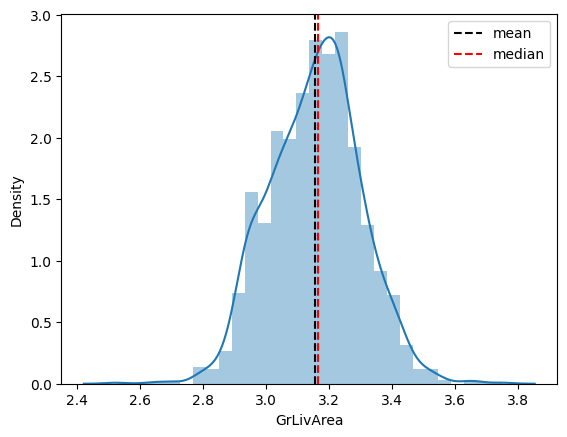

In [18]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = np.log10(house_numeric['GrLivArea'])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median : ", x.median())
print("Mean : " , x.mean())
print("Std Dev : ", x.std())
plt.show()

<ipython-input-23-4a53b23e026e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median :  484.0
Mean :  500.76214648295866
Std Dev :  185.68051979433164


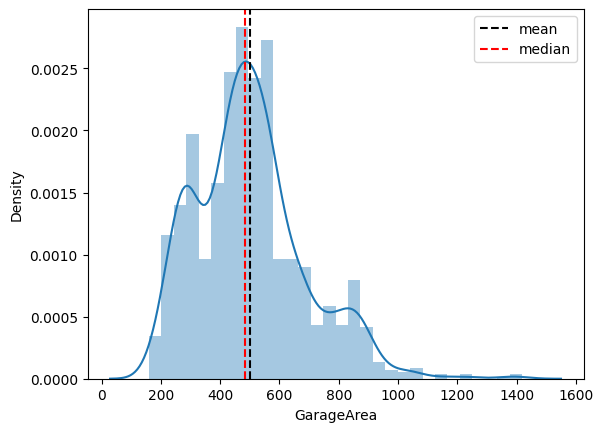

In [23]:
# Menghilangkan nilai nol pada GarageArea

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev

x = house_numeric['GarageArea'][house_numeric['GarageArea'] > 0 ]
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="median")
first_legend = plt.legend(handles=[line1, line2], loc=1)
print("Median : ", x.median())
print("Mean : " , x.mean())
print("Std Dev : ", x.std())
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* Dengan menggunakan transformasi skala maupun menghapus anomali distribusi menjadi lebih mendekati distribusi normal


# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

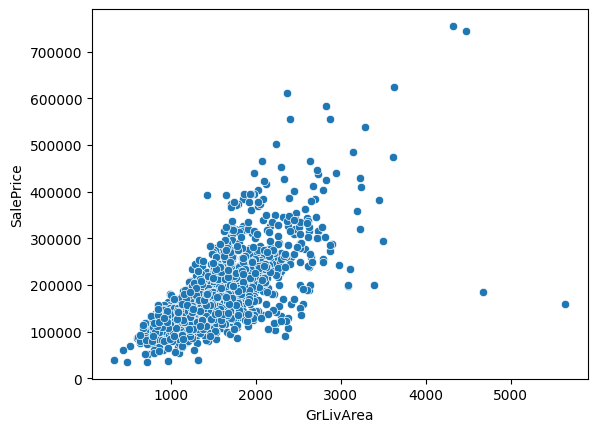

In [28]:
ax = sns.scatterplot(y="SalePrice", x="GrLivArea", data=house_numeric)
plt.show()

# `GarageArea` dengan `SalePrice`

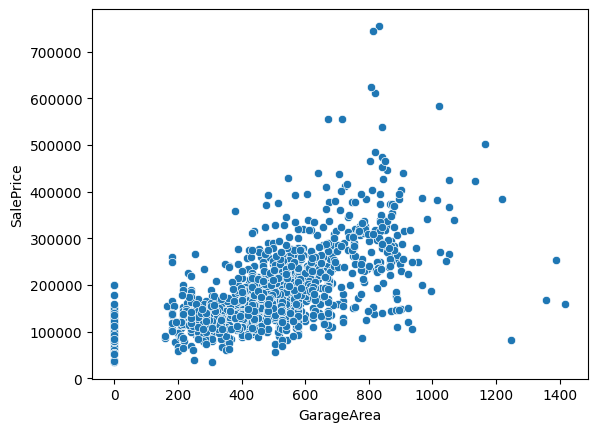

In [29]:
ax = sns.scatterplot(y="SalePrice", x="GarageArea", data=house_numeric)
plt.show()

#### **Hipotesis tentang hubungan antar-variabel**

* dapat dilihat bahwa variabel GrLivArea memiliki korelasi positif dengan variabel SalePrice
* dapat dilihat bahwa variabel GarageArea memiliki korelasi positif dengan variabel SalePrice
* memiliki anomali yaitu titik yanng berada di ujung kanan